<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Copy_of_ML_Mid_Term_Exam_Question_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_srt = sorted(data_q1)
median = np.median(data_srt)
print(f"Median: {median}")
# Q1 and Q2
#Q1 = data_srt.quantile(0.25)
#Q3 = data_srt.quantile(0.75)
Q1 = np.percentile(data_srt, 25)
Q3 = np.percentile(data_srt, 75)

IQR = Q3 - Q1
print(f"IQR: {IQR}")
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(f"Lower : {lower}")
print(f"Upper : {upper}")
outlier = (500 > upper) | (500 < lower)
print(f"Outliers: {outlier}")

Median: 33.0
IQR: 2.0
Lower : 29.0
Upper : 37.0
Outliers: True


Explain median + IQR may be better than mean + standard deviation for this dataset : This dataset 500 is big outlier. So, the mean and standard devition distored. Median and IQR not affectied outlier . That's why median IQR is better.

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here.
Bayes formula = P(D | +) = (P(+|D)P(D)) / (P(+|D)P(D)+ P(+|-D)P(-D)

P(+|D)P(D) = 0.009
P(+|D)P(D)+ P(+|-D)P(-D) = 0.0792
now , 0.009 + 0.0792 = 0.0882

PPV = 0.009 / 0.0882 = 0.10204

again ,
P(D) = 0.20
0.90 * 0.20 = 0.18
FP = 0.08 * 0.80 = 0.064
PPV = 0.18 / 0.244 = 0.7378


Explain : PPV increases when prevalence increases.
because more people have the disease, so a positive test is more likely to be true.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here.
Ans1. Type of ML task :
It's a binary classification task, because target columns two class 0 or 1.

Ans2.Four reasonable preprocessing step :

1. MIssing value handaling age, daily_clicks or region.
2. Categorical columns Encode / one hot region.
3. Scalling numerical columns and outlier handaling
4. Drop columns if a don't need a target columns

Ans3.End-to-end ML pipeline :

Fristable i'm loading to dataset . Then understand dataset, Check missing value if found missing value i'm handaling this . Then, I would encode the categorical column region using one-hot encoding and scale the numeric features so that all features are on a similar scale. Next, I would split the data into training and test sets to fairly evaluate the model's performance. After that, I would train a binary classification model. Once the model train, I would check how well the model works using accuracy, precision, recall, and F1-score. Finally, I would analyze feature importance, validate the results on the test set, and prepare the model for deployment if it performs well.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [ ]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5 non-null      float64
 1   region        7 non-null      object 
 2   purchases     6 non-null      float64
 3   premium_user  7 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 356.0+ bytes


None

,0
age,2
region,0
purchases,1
premium_user,0


age             5
region          4
purchases       6
premium_user    2
dtype: int64


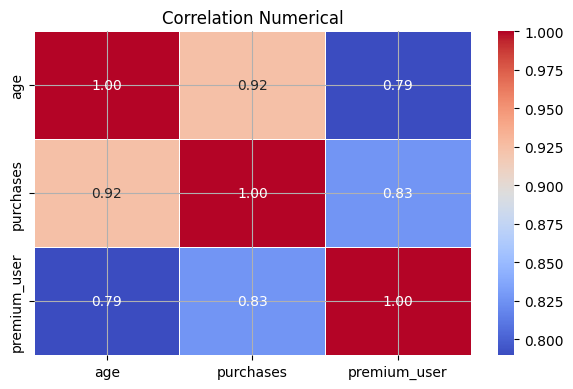

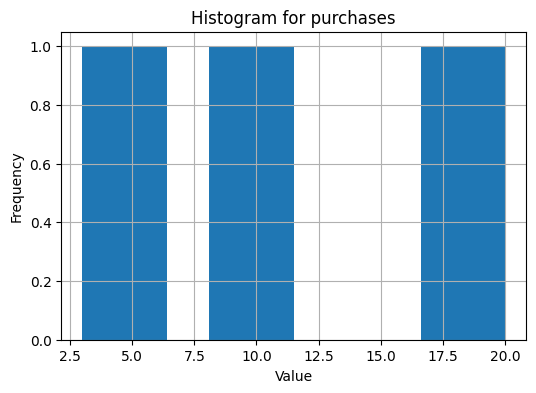

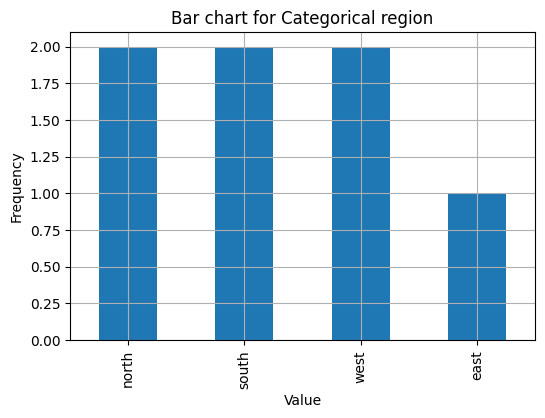

In [ ]:
# 1 Ans :
import matplotlib.pyplot as plt
import seaborn as sns
#Compact EDA using pandas
display(df.info())
# missing value :
display(df.isna().sum())
#Show number of unique values per column
#df['age'].unique()
#df['region'].unique()
#df['purchases'].unique()
#df['premium_user'].unique()
print(df.nunique())
#correlation among numeric columns:
numerical_col =['age','purchases','premium_user']
corr_rlt = df[numerical_col].corr()
sns.heatmap(corr_rlt,annot=True,cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.title("Correlation Numerical")
plt.tight_layout()
plt.show()
#A Hisrogram chart for purchases frequency
df['purchases'].plot(kind='hist')
plt.title(f"Histogram for purchases")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# A bar chart for region frequency
df['region'].value_counts().plot(kind='bar')
plt.title(f"Bar chart for Categorical region")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 2 Ans :Preprocess the dataset using sklearn plus pandas
numerical_col =['age','purchases']
categorical_col ='region'
target_col ='premium_user'
#Impute age with median.
df['age'] = df['age'].fillna(df['age'].median())
#Impute purchases with mean
df['purchases'] = df['purchases'].fillna(df['purchases'].mean())
#One hot encode region
df = pd.get_dummies(df,columns=[categorical_col],dtype=int)
#Scale all numeric columns using RobustScaler
#scaler = RobustScaler()
#df[numerical_col] = scaler.fit_transform(df[numerical_col])
df

,age,purchases,premium_user,region_east,region_north,region_south,region_west
0,25.0,3.000000,0,0,1,0,0
1,30.0,10.000000,1,0,0,1,0
2,30.0,5.000000,0,0,1,0,0
3,22.0,10.833333,0,1,0,0,0
4,45.0,20.000000,1,0,0,0,1
5,52.0,18.000000,1,0,0,0,1
6,30.0,9.000000,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           7 non-null      float64
 1   purchases     7 non-null      float64
 2   premium_user  7 non-null      int64  
 3   region_east   7 non-null      int64  
 4   region_north  7 non-null      int64  
 5   region_south  7 non-null      int64  
 6   region_west   7 non-null      int64  
dtypes: float64(2), int64(5)
memory usage: 524.0 bytes


In [ ]:
#Create one domain driven feature :
def high_spender(purchases):
    if purchases > df['purchases'].median():
        return 1
    else:
        return 0

df['high_spender'] = df['purchases'].apply(high_spender)

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 30, 50, 70, 100],
    labels=["Young", "Middle", "Middle_Old", "Old"]
)
df['interaction'] = df['age']* df['purchases']
df.head()

,age,purchases,premium_user,region_east,region_north,region_south,region_west,high_spender,age_group,interaction
0,25.0,3.000000,0,0,1,0,0,0,Young,75.000000
1,30.0,10.000000,1,0,0,1,0,0,Young,300.000000
2,30.0,5.000000,0,0,1,0,0,0,Young,150.000000
3,22.0,10.833333,0,1,0,0,0,1,Young,238.333333
4,45.0,20.000000,1,0,0,0,1,1,Middle,900.000000


In [ ]:
#Scale all numeric columns using RobustScaler
scaler = RobustScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])

print("Final transformed dataframe ready for model training:")
display(df)


# Note : domain driven er age jodi scalling kora hoy ta hole kichu value Nan hoye jay

Final transformed dataframe ready for model training:


,age,purchases,premium_user,region_east,region_north,region_south,region_west,high_spender,age_group,interaction
0,-0.5,-0.943820,0,0,1,0,0,0,Young,75.000000
1,0.0,0.000000,1,0,0,1,0,0,Young,300.000000
2,0.0,-0.674157,0,0,1,0,0,0,Young,150.000000
3,-0.8,0.112360,0,1,0,0,0,1,Young,238.333333
4,1.5,1.348315,1,0,0,0,1,1,Middle,900.000000
5,2.2,1.078652,1,0,0,0,1,1,Middle_Old,936.000000
6,0.0,-0.134831,0,0,0,1,0,0,Young,270.000000


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


   area_sqft  bedrooms
5       2000         4
2       1200         3
4       1800         4
3       1500         3
5    300
2    170
4    260
3    210
Name: price, dtype: int64
[100.         130.76923077]
Slope(m): [0.15384615 5.38461538]
intercept(c): -33.84615384615387
Mean: 19.615384615384613
RMSE: 19.61915499208746
R2: -0.7107166337935567


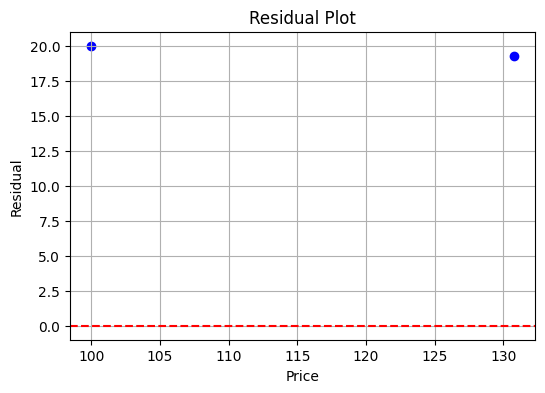

In [ ]:
# Q5 – Student Answer
# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

display(df2)

X = df2[['area_sqft','bedrooms']]
y = df2['price']
#train and test
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.20,random_state=42)
print(X_train)
print(y_train)

#LinearRegression model to predict:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)
# intercept, coefficients :
print("Slope(m):", model.coef_)
print("intercept(c):", model.intercept_)
#MAE ,RMSE,R² :
mae = mean_absolute_error(y_test, pred)
print("Mean:", mae)
mse = mean_squared_error(y_test, pred)
#print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, pred)
print("R2:", r2)

#plot :
res = y_test-pred
plt.scatter(pred, res, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


#Note : Residual around 0 , that means model good prediction the price

Note : Residual around 0 , that means model good prediction the price

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below
y_pred = (y_prob >= 0.5).astype(int)
print(y_pred)
#Confusion matrix:
cm = confusion_matrix(y_true, y_pred)
print(f"Confusion :",cm)
# Precision :
prec = precision_score(y_true, y_pred)
print(f"Precision :",prec)
#Recall :
recall = recall_score(y_true, y_pred)
print(f"Recall :",recall)
# F1 Score :
f1 = f1_score(y_true, y_pred)
print(f"F1 :",f1)

[1 0 1 0 1 0 1 0 1 0]
Confusion : [[5 0]
 [0 5]]
Precision : 1.0
Recall : 1.0
F1 : 1.0


In [ ]:
# With threshold 0.3, convert probabilities to class predictions again and recompute the same metrics.
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
y_pred = (y_prob >= 0.3).astype(int)
print(y_pred)
#Confusion matrix:
cm = confusion_matrix(y_true, y_pred)
print(f"Confusion :",cm)
# Precision :
prec = precision_score(y_true, y_pred)
print(f"Precision :",prec)
#Recall :
recall = recall_score(y_true, y_pred)
print(f"Recall :",recall)
# F1 Score :
f1 = f1_score(y_true, y_pred)
print(f"F1 :",f1)

[1 0 1 0 1 1 1 1 1 0]
Confusion : [[3 2]
 [0 5]]
Precision : 0.7142857142857143
Recall : 1.0
F1 : 0.8333333333333334


In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.
Ans : Threshold to 0.3 predict many positives. Recall 1.0 because all true positive detecte. Precision decrease prediction false positive. A low threshold catches many positive but also wrong prediction.

AUC :1.000


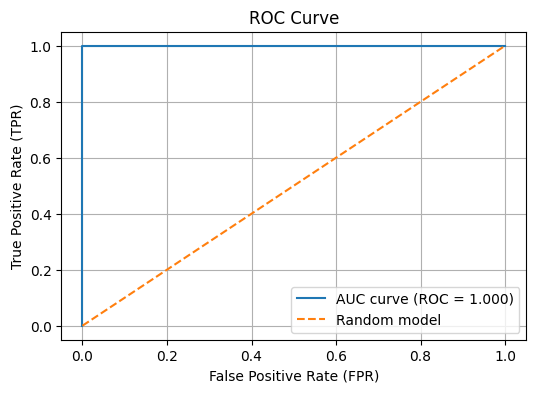

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
fpr,tpr,thresholds = roc_curve(y_true, y_prob)
auc =roc_auc_score(y_true, y_prob)
print(f"AUC :{auc:.3f}")

# Plot:
plt.figure()
plt.plot(fpr, tpr, label=f'AUC curve (ROC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random model')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

Add a one or two line comment on what a high or low AUC means in this context:
AUC 1.000 it's small Dataset so model is overfiting .

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._

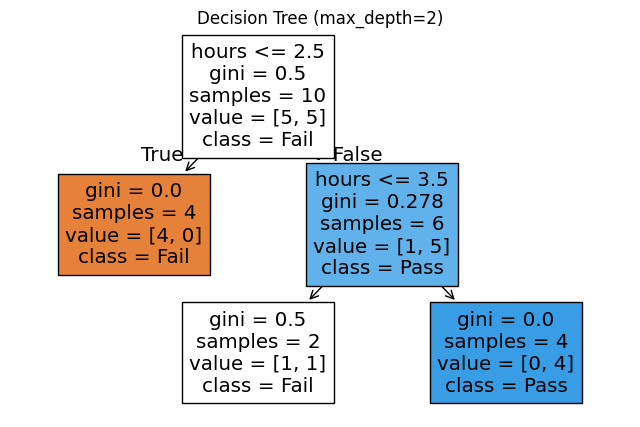

In [ ]:
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
X = df3[['hours']]
y = df3['passed']

# fit Decision Tree
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)
plt.figure(figsize=(8,5))
plot_tree(model, feature_names=['hours'], class_names=['Fail','Pass'], filled=True)
plt.title("Decision Tree (max_depth=2)")
plt.show()

###Ans : The tree depth of 2,it's not very complex. Even the dataset is small,tree does not overfit.It is likely to generalize reasonably well to new data.